In [352]:
## ANALYSIS OF SUICIDES IN INDIA

In [353]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [354]:
## Data Exploration

In [355]:
edu=pd.read_csv('Educational_status_of_suicide_victimes_state.csv')

In [356]:
edu['STATE/UT']=edu['STATE/UT'].str.upper()
edu.head(20)

,STATE/UT,Year,CAUSE,Male,Female,Total
0,ANDHRA PRADESH,2001,No Education,2117,1657,3774
1,ANDHRA PRADESH,2001,Primary,1536,1076,2612
2,ANDHRA PRADESH,2001,Middle,1281,722,2003
3,ANDHRA PRADESH,2001,Matriculate/Secondary,818,449,1267
4,ANDHRA PRADESH,2001,Hr. Secondary/Intermediate/Pre-Universit,427,168,595
5,ANDHRA PRADESH,2001,Diploma,75,23,98
6,ANDHRA PRADESH,2001,Graduate,104,42,146
7,ANDHRA PRADESH,2001,Post Graduate and Above,21,6,27
8,ANDHRA PRADESH,2001,Total,6379,4143,10522
9,ANDHRA PRADESH,2002,No Education,2505,1700,4205


In [357]:
df=edu.drop(columns=['Year'])
df.describe()

,Male,Female,Total
count,4455.000000,4455.000000,4455.000000
mean,499.030303,274.204265,773.241751
std,1330.462701,737.589017,2052.121347
min,0.000000,0.000000,0.000000
25%,5.000000,2.000000,8.000000
50%,38.000000,19.000000,57.000000
75%,355.500000,170.000000,539.500000
max,11892.000000,6868.000000,16927.000000


In [358]:
## DATA CLEANING

In [359]:
edu.duplicated().any()

False

In [360]:
edu=edu[edu['Total']!=0]

In [361]:
edu.isnull().sum()

STATE/UT    0
Year        0
CAUSE       0
Male        0
Female      0
Total       0
dtype: int64

In [362]:
edu['STATE/UT']=edu['STATE/UT'].apply(lambda x: "ANDAMAN AND NICOBAR" if x=="A & N ISLANDS" else x)
edu['STATE/UT']=edu['STATE/UT'].apply(lambda x: "DAMAN AND DIU" if x=="DAMAN & DIU" else x)
edu['STATE/UT']=edu['STATE/UT'].apply(lambda x: "DADRA AND NAGAR HAVELI" if x=="D & N HAVELI" else x)
edu['STATE/UT']=edu['STATE/UT'].apply(lambda x: "JAMMU AND KASHMIR" if x=="JAMMU & KASHMIR" else x)
edu['STATE/UT']=edu['STATE/UT'].apply(lambda x: "DELHI" if x=="DELHI (UT)" else x)
edu['CAUSE']=edu['CAUSE'].apply(lambda x: "Diploma" if x=="Diploma/ITI/Certificate" else x)
edu['CAUSE']=edu['CAUSE'].apply(lambda x: "Graduate" if x=="Graduate and above" else x)
edu['CAUSE']=edu['CAUSE'].apply(lambda x: "Matriculate/Secondary (upto class-10)" if x=="Matriculate/Secondary" else x)
edu['CAUSE']=edu['CAUSE'].apply(lambda x: "Middle (upto class-8)" if x=="Middle" else x)
edu['CAUSE']=edu['CAUSE'].apply(lambda x: "Primary (upto class-5)" if x=="Primary" else x)
edu['CAUSE']=edu['CAUSE'].apply(lambda x: "Higher Secondary/Intermediate/Pre-University(upto class-12)" if x=="Hr. Secondary/Intermediate/Pre-University" else x)
edu['CAUSE']=edu['CAUSE'].apply(lambda x: "Higher Secondary/Intermediate/Pre-University(upto class-12)" if x=="Hr. Secondary/Intermediate/Pre-Universit" else x)
edu['CAUSE']=edu['CAUSE'].apply(lambda x: "Higher Secondary/Intermediate/Pre-University(upto class-12)" if x=="Higher Secondary/ Intermediate/ Pre-University (upto class-12)" else x)

In [363]:
edu['CAUSE']=edu['CAUSE'].str.upper()

In [364]:
edu=edu[~edu.CAUSE.isin(['TOTAL'])]

In [365]:
edu=edu[~edu.CAUSE.isin(['PROFESSIONALS (MBA; ETC.)'])]

In [366]:
## DATA VISUALIZATION

Text(0.5, 1.0, 'Suicide rate in India from 2001-2014')

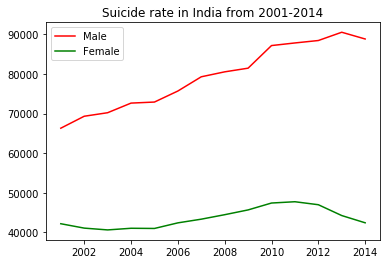

In [367]:
eduSort = edu.groupby(['Year'],as_index=False).sum()
plt.figure(figsize=(6,4))
plt.plot(eduSort['Year'],eduSort['Male'],"r-",label="Male")
plt.plot(eduSort['Year'],eduSort['Female'],"g-",label="Female")
plt.legend()
plt.title("Suicide rate in India from 2001-2014")

Text(0.5, 1.0, 'Female Suicide rate in India over Educational Causes')

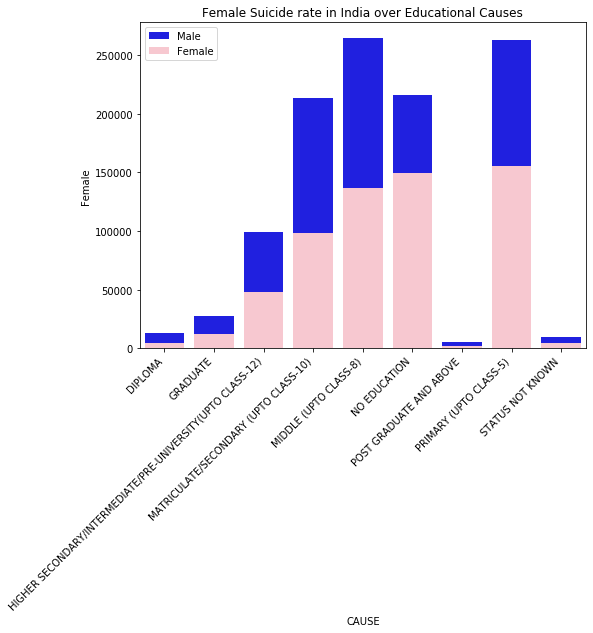

In [368]:
eduSort = edu.groupby(['CAUSE'],as_index=False).sum()
plt.figure(figsize=(8,6))
sns.barplot(x='CAUSE',y='Male',data=eduSort,label="Male",color='blue')
plt.xticks(rotation=45,ha='right')
plt.title("Male Suicide rate in India over Educational Causes")
sns.barplot(x='CAUSE',y='Female',data=eduSort,label="Female",color='pink')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.title("Female Suicide rate in India over Educational Causes")

Text(0.5, 1.0, 'Female Suicide rate in all the states of India')

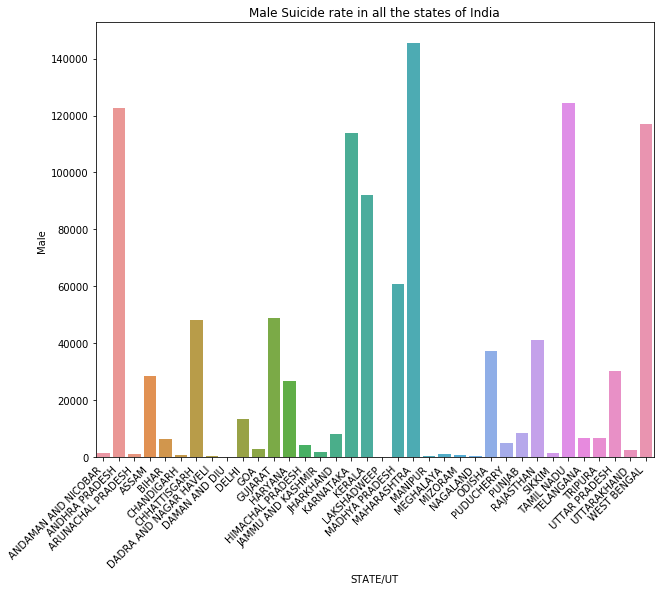

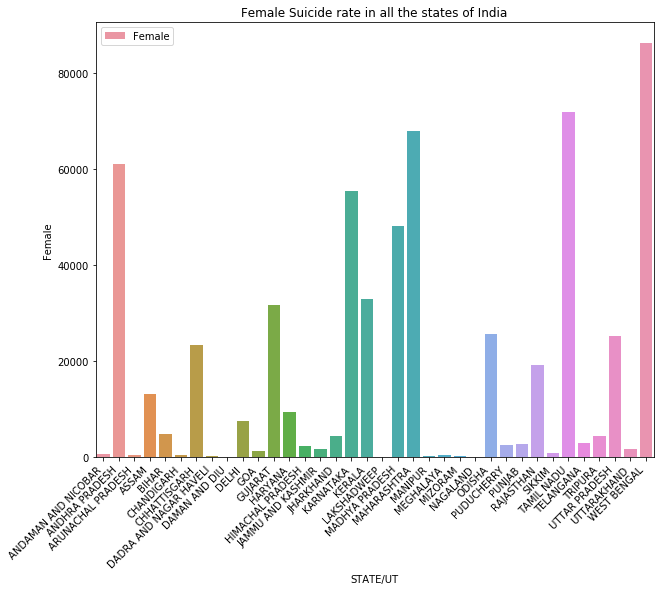

In [369]:
eduSort = edu.groupby(['STATE/UT'],as_index=False).sum()
plt.figure(figsize=(10,8))
sns.barplot(x='STATE/UT',y='Male',data=eduSort,label="Male")
plt.xticks(rotation=45,ha='right')
plt.title("Male Suicide rate in all the states of India")
plt.figure(figsize=(10,8))
sns.barplot(x='STATE/UT',y='Female',data=eduSort,label="Female")
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.title("Female Suicide rate in all the states of India")

In [370]:
eduSort = edu.groupby(['STATE/UT'],as_index=False).sum()
eduSort = eduSort.sort_values('Total',ascending=False)
eduSort.head(10)

,STATE/UT,Year,Male,Female,Total
20,MAHARASHTRA,224840,145463,67836,213302
35,WEST BENGAL,224840,117151,86195,203346
30,TAMIL NADU,224840,124544,71871,196419
1,ANDHRA PRADESH,224840,122530,60977,183508
16,KARNATAKA,224840,113776,55357,169135
17,KERALA,224840,92011,33000,125011
19,MADHYA PRADESH,224840,60679,48100,108779
11,GUJARAT,224840,48802,31759,80561
6,CHHATTISGARH,224840,48157,23443,71600
25,ODISHA,224840,37121,25733,62854


In [371]:
eduSort = edu.groupby(['STATE/UT','CAUSE',],as_index=False).sum()
educ=eduSort.set_index("STATE/UT",drop=False)
eduSort = edu.groupby(['STATE/UT','Year',],as_index=False).sum()
eduy=eduSort.set_index("STATE/UT",drop=False)

Text(0.5, 1.0, 'Maharashtra suicide rates')

<Figure size 720x288 with 0 Axes>

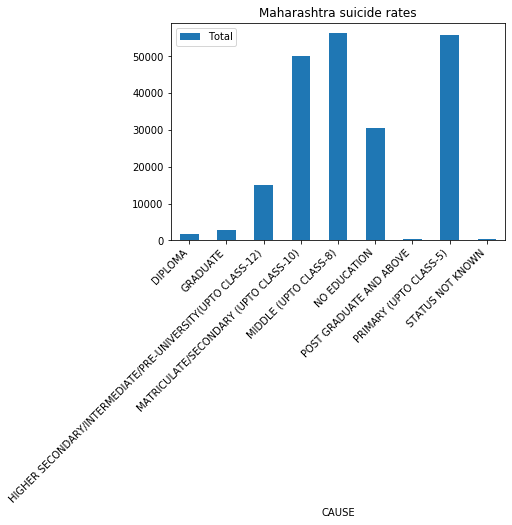

In [372]:
df=educ.loc["MAHARASHTRA":"MAHARASHTRA","CAUSE":"Total"]
plt.figure(figsize=(10,4))
df.plot(x='CAUSE',y='Total',kind='bar')
plt.legend()
plt.xticks(rotation=45,ha='right')
plt.title("Maharashtra suicide rates")

Text(0.5, 1.0, 'Tamil Nadu suicide rates')

<Figure size 720x288 with 0 Axes>

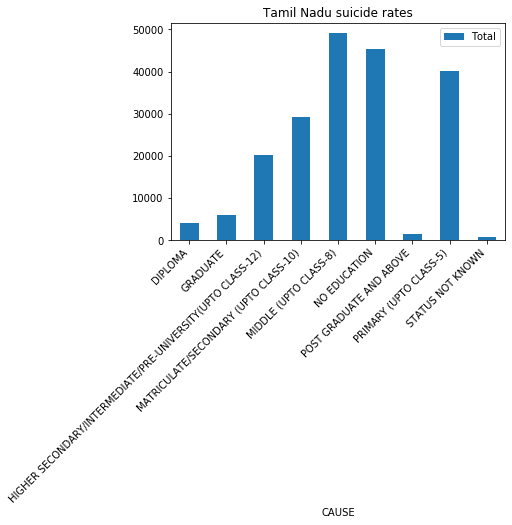

In [373]:
df=educ.loc["TAMIL NADU":"TAMIL NADU","CAUSE":"Total"]
plt.figure(figsize=(10,4))
df.plot(x='CAUSE',y='Total',kind='bar')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.title("Tamil Nadu suicide rates")

Text(0.5, 1.0, 'West Bengal Suicide rate')

<Figure size 720x288 with 0 Axes>

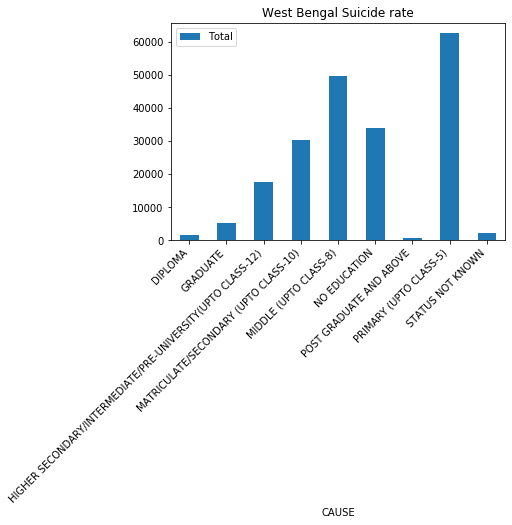

In [374]:
df=educ.loc["WEST BENGAL":"WEST BENGAL","CAUSE":"Total"]
plt.figure(figsize=(10,4))
df.plot(x='CAUSE',y='Total',kind='bar')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.title("West Bengal Suicide rate")

Text(0.5, 1.0, 'Karnataka suicide rates')

<Figure size 720x288 with 0 Axes>

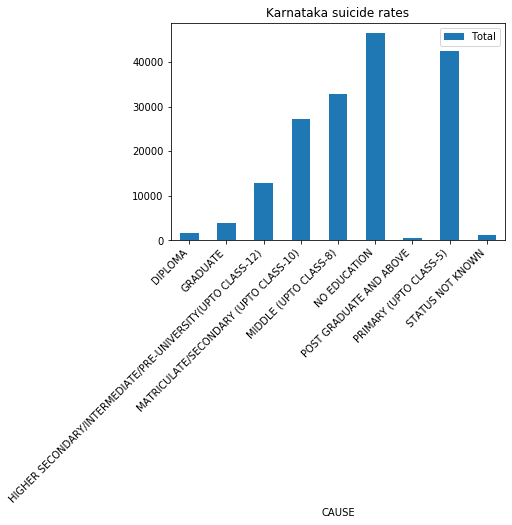

In [375]:
df=educ.loc["KARNATAKA":"KARNATAKA","CAUSE":"Total"]
plt.figure(figsize=(10,4))
df.plot(x='CAUSE',y='Total',kind='bar')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.title("Karnataka suicide rates")

Text(0.5, 1.0, 'Andhra Pradesh Suicide rate')

<Figure size 720x288 with 0 Axes>

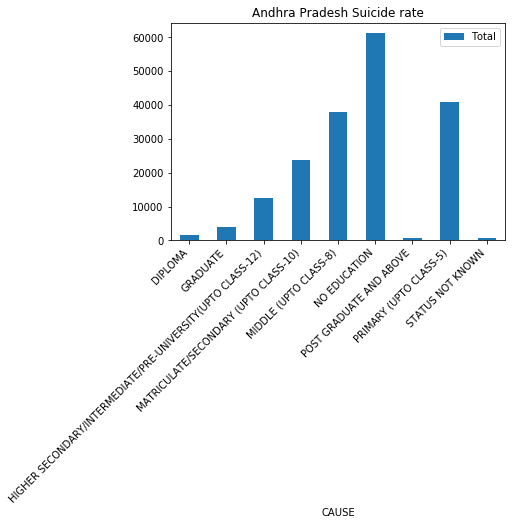

In [376]:
df=educ.loc["ANDHRA PRADESH":"ANDHRA PRADESH","CAUSE":"Total"]
plt.figure(figsize=(10,4))
df.plot(x='CAUSE',y='Total',kind='bar')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.title("Andhra Pradesh Suicide rate")

Text(0.5, 1.0, 'Madhya Pradesh suicide rates')

<Figure size 720x288 with 0 Axes>

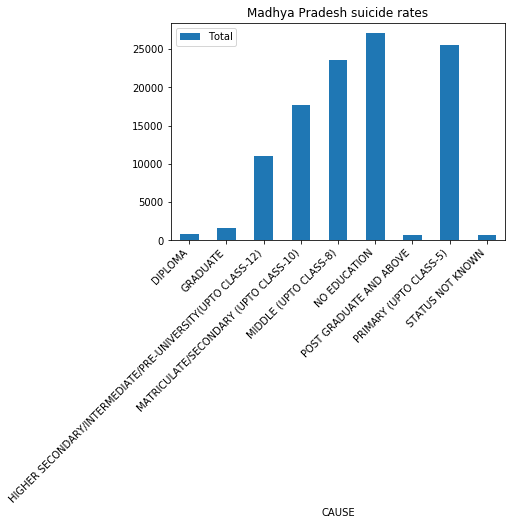

In [377]:
df=educ.loc["MADHYA PRADESH":"MADHYA PRADESH","CAUSE":"Total"]
plt.figure(figsize=(10,4))
df.plot(x='CAUSE',y='Total',kind='bar')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.title("Madhya Pradesh suicide rates")

Text(0.5, 1.0, 'Maharashtra suicide rates')

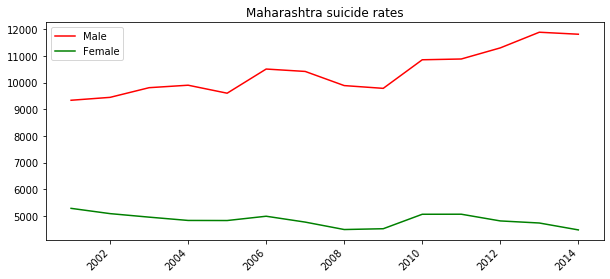

In [378]:
df=eduy.loc["MAHARASHTRA":"MAHARASHTRA","Year":"Total"]
plt.figure(figsize=(10,4))
plt.plot(df['Year'],df['Male'],"r-",label="Male")
plt.plot(df['Year'],df['Female'],"g-",label="Female")
plt.legend()
plt.xticks(rotation=45,ha='right')
plt.title("Maharashtra suicide rates")

Text(0.5, 1.0, 'West Bengal suicide rates')

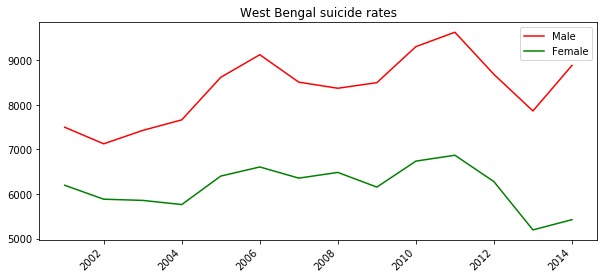

In [379]:
df=eduy.loc["WEST BENGAL":"WEST BENGAL","Year":"Total"]
plt.figure(figsize=(10,4))
plt.plot(df['Year'],df['Male'],"r-",label="Male")
plt.plot(df['Year'],df['Female'],"g-",label="Female")
plt.legend()
plt.xticks(rotation=45,ha='right')
plt.title("West Bengal suicide rates")

Text(0.5, 1.0, 'Tamil Nadu suicide rates')

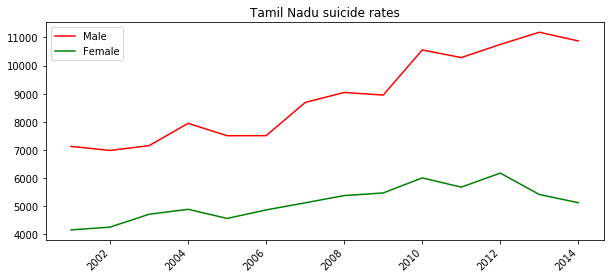

In [380]:
df=eduy.loc["TAMIL NADU":"TAMIL NADU","Year":"Total"]
plt.figure(figsize=(10,4))
plt.plot(df['Year'],df['Male'],"r-",label="Male")
plt.plot(df['Year'],df['Female'],"g-",label="Female")
plt.legend()
plt.xticks(rotation=45,ha='right')
plt.title("Tamil Nadu suicide rates")

Text(0.5, 1.0, 'Andhra Pradesh suicide rates')

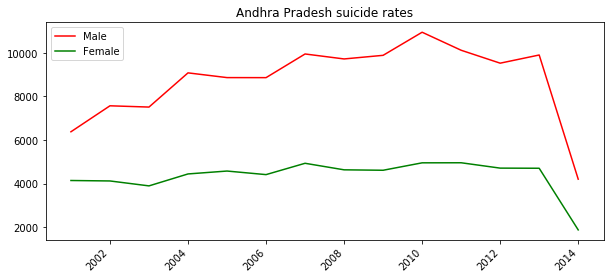

In [381]:
df=eduy.loc["ANDHRA PRADESH":"ANDHRA PRADESH","Year":"Total"]
plt.figure(figsize=(10,4))
plt.plot(df['Year'],df['Male'],"r-",label="Male")
plt.plot(df['Year'],df['Female'],"g-",label="Female")
plt.legend()
plt.xticks(rotation=45,ha='right')
plt.title("Andhra Pradesh suicide rates")

Text(0.5, 1.0, 'Karnataka suicide rates')

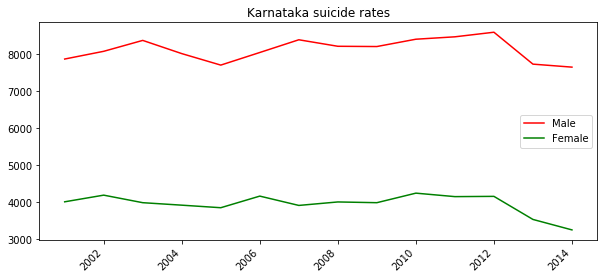

In [382]:
df=eduy.loc["KARNATAKA":"KARNATAKA","Year":"Total"]
plt.figure(figsize=(10,4))
plt.plot(df['Year'],df['Male'],"r-",label="Male")
plt.plot(df['Year'],df['Female'],"g-",label="Female")
plt.legend()
plt.xticks(rotation=45,ha='right')
plt.title("Karnataka suicide rates")

Text(0.5, 1.0, 'Madhya Pradesh suicide rates')

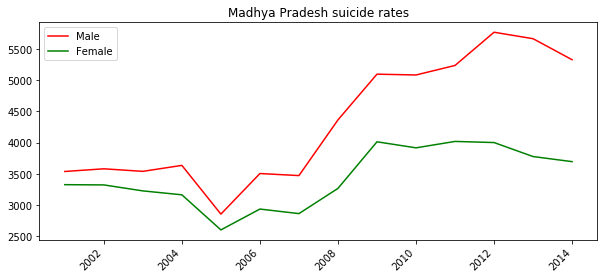

In [383]:
df=eduy.loc["MADHYA PRADESH":"MADHYA PRADESH","Year":"Total"]
plt.figure(figsize=(10,4))
plt.plot(df['Year'],df['Male'],"r-",label="Male")
plt.plot(df['Year'],df['Female'],"g-",label="Female")
plt.legend()
plt.xticks(rotation=45,ha='right')
plt.title("Madhya Pradesh suicide rates")

Text(0.5, 1.0, 'Kerala suicide rates')

<Figure size 720x432 with 0 Axes>

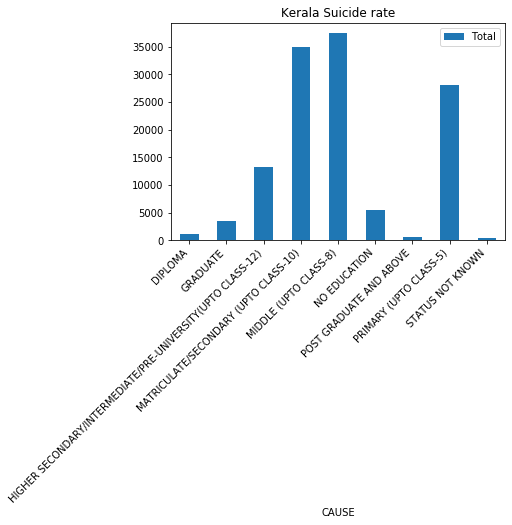

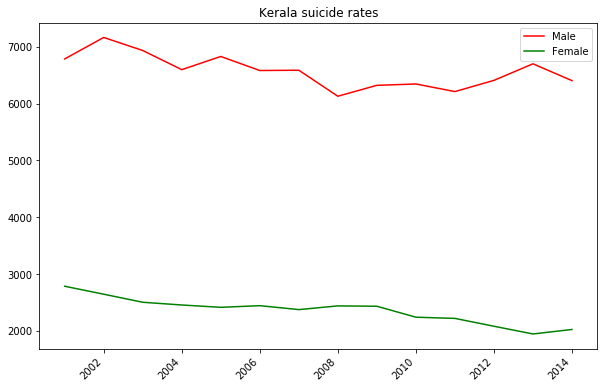

In [384]:
df=educ.loc["KERALA":"KERALA","CAUSE":"Total"]
df1=eduy.loc["KERALA":"KERALA","Year":"Total"]
plt.figure(figsize=(10,6))
df.plot(x='CAUSE',y='Total',kind='bar')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.title("Kerala Suicide rate")

plt.figure(figsize=(10,6))
plt.plot(df1['Year'],df1['Male'],"r-",label="Male")
plt.plot(df1['Year'],df1['Female'],"g-",label="Female")
plt.legend()
plt.xticks(rotation=45,ha='right')
plt.title("Kerala suicide rates")

Text(0.5, 1.0, 'CHHATTISGARH suicide rates')

<Figure size 720x432 with 0 Axes>

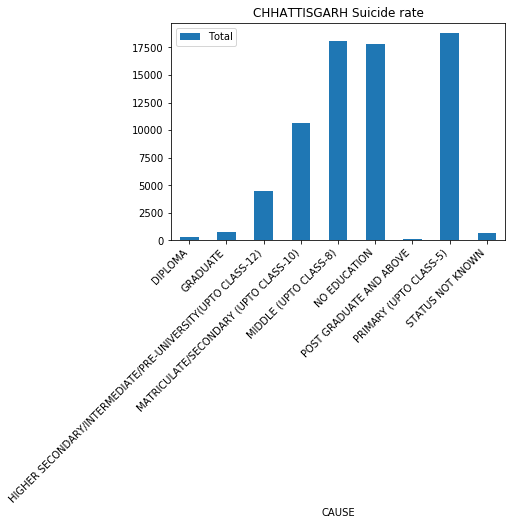

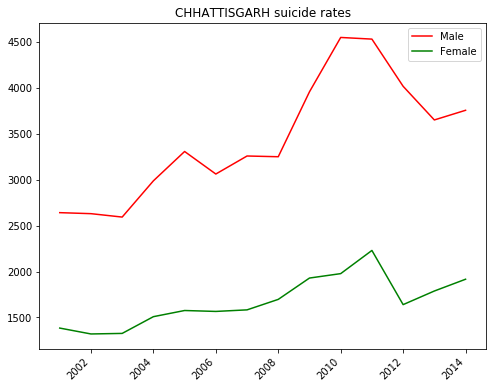

In [385]:
df=educ.loc["CHHATTISGARH":"CHHATTISGARH","CAUSE":"Total"]
df1=eduy.loc["CHHATTISGARH":"CHHATTISGARH","Year":"Total"]
plt.figure(figsize=(10,6))
df.plot(x='CAUSE',y='Total',kind='bar')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.title("CHHATTISGARH Suicide rate")

plt.figure(figsize=(8,6))
plt.plot(df1['Year'],df1['Male'],"r-",label="Male")
plt.plot(df1['Year'],df1['Female'],"g-",label="Female")
plt.legend()
plt.xticks(rotation=45,ha='right')
plt.title("CHHATTISGARH suicide rates")

Text(0.5, 1.0, 'GUJARAT suicide rates')

<Figure size 720x432 with 0 Axes>

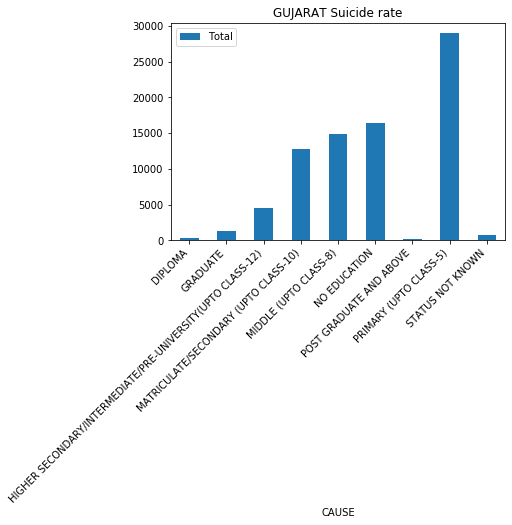

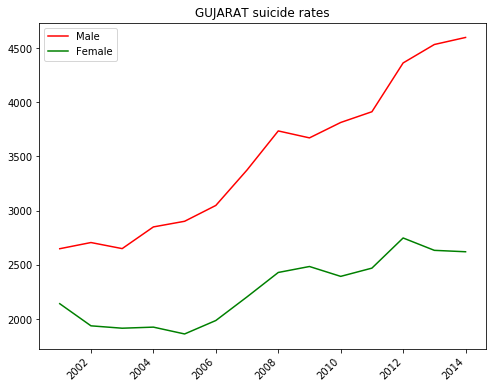

In [386]:
df=educ.loc["GUJARAT":"GUJARAT","CAUSE":"Total"]
df1=eduy.loc["GUJARAT":"GUJARAT","Year":"Total"]
plt.figure(figsize=(10,6))
df.plot(x='CAUSE',y='Total',kind='bar')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.title("GUJARAT Suicide rate")

plt.figure(figsize=(8,6))
plt.plot(df1['Year'],df1['Male'],"r-",label="Male")
plt.plot(df1['Year'],df1['Female'],"g-",label="Female")
plt.legend()
plt.xticks(rotation=45,ha='right')
plt.title("GUJARAT suicide rates")

Text(0.5, 1.0, 'ODISHA suicide rates')

<Figure size 720x432 with 0 Axes>

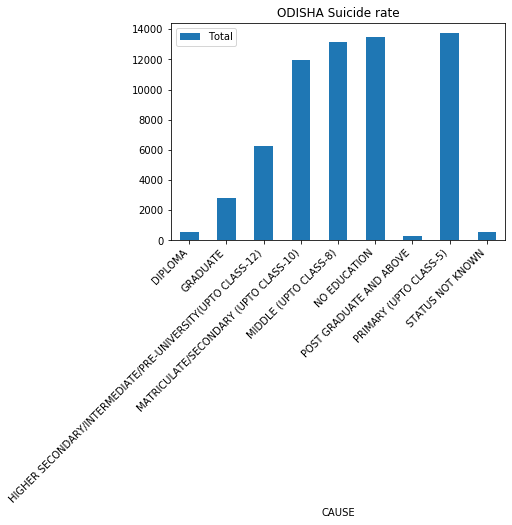

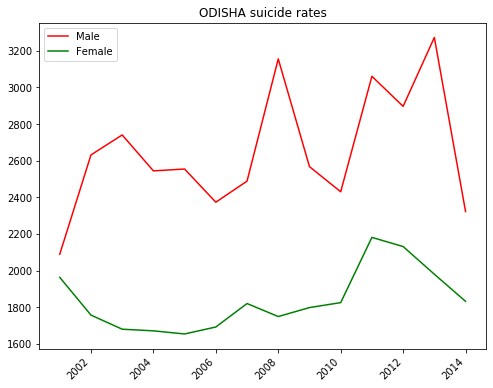

In [387]:
df=educ.loc["ODISHA":"ODISHA","CAUSE":"Total"]
df1=eduy.loc["ODISHA":"ODISHA","Year":"Total"]
plt.figure(figsize=(10,6))
df.plot(x='CAUSE',y='Total',kind='bar')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.title("ODISHA Suicide rate")

plt.figure(figsize=(8,6))
plt.plot(df1['Year'],df1['Male'],"r-",label="Male")
plt.plot(df1['Year'],df1['Female'],"g-",label="Female")
plt.legend()
plt.xticks(rotation=45,ha='right')
plt.title("ODISHA suicide rates")

Text(0.5, 1, 'Total Suicide Distribution over Educational cause')

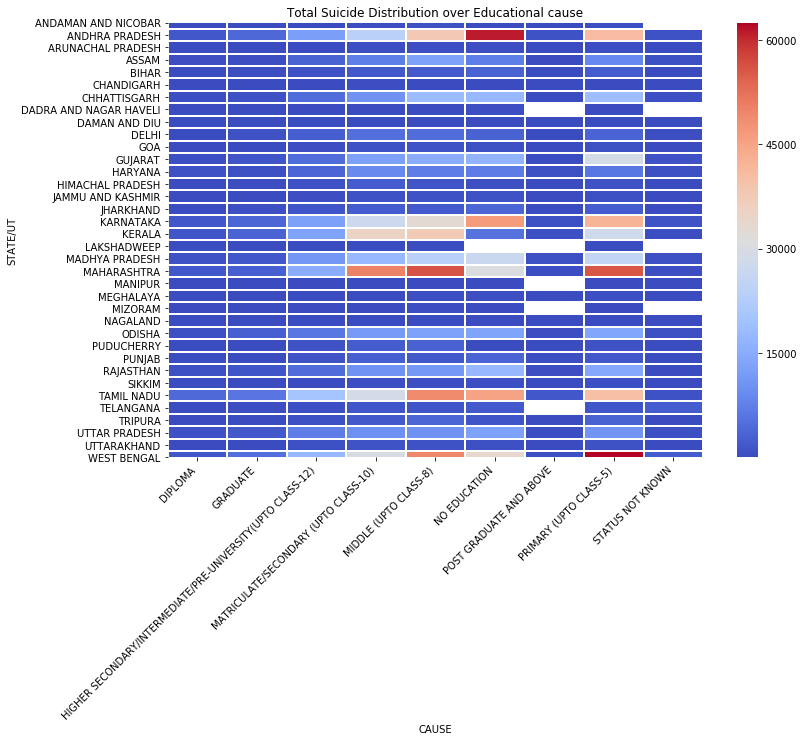

In [390]:
edusort = edu.groupby(['STATE/UT','CAUSE'],as_index=False).sum()
plt.figure(figsize=(12,8))
educ=edusort.pivot_table(values='Total',columns='CAUSE',index='STATE/UT')
sns.heatmap(educ,cmap='coolwarm',linecolor='white',linewidths=1)
plt.xticks(rotation=45,ha='right')
plt.title('Total Suicide Distribution over Educational cause')

In [389]:
df=educ.loc["NAGALAND":"NAGALAND","CAUSE":"Total"]
df1=eduy.loc["NAGALAND":"NAGALAND","Year":"Total"]
df.head(20)
#df1.head(20)

CAUSE,DIPLOMA,GRADUATE,HIGHER SECONDARY/INTERMEDIATE/PRE-UNIVERSITY(UPTO CLASS-12),MATRICULATE/SECONDARY (UPTO CLASS-10),MIDDLE (UPTO CLASS-8),NO EDUCATION,POST GRADUATE AND ABOVE,PRIMARY (UPTO CLASS-5),STATUS NOT KNOWN
STATE/UT,,,,,,,,,
NAGALAND,1.0,2.0,17.0,92.0,140.0,46.0,1.0,93.0,5.0
